# Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
def initialize_parameters(seed=7, num_agents=1000, m=3, penalty_margin=0.5):
    np.random.seed(seed)
    type_dist = np.random.dirichlet(np.random.uniform(1, 2, m))
    payments, penalties = generate_payments_and_penalties(type_dist, penalty_margin, m)
    return num_agents, m, type_dist, payments, penalties

In [127]:
def generate_payments_and_penalties(type_dist, penalty_margin, m):
    payments = np.zeros(m)
    cumulative = 0
    for i in range(m):
        cumulative += type_dist[i]
        payments[i] = 1 + cumulative / 2
    penalties = payments + penalty_margin
    return payments, penalties

In [128]:
def valuation_function(i, k, payments):
    if k == i:
        return payments[i]
    elif k > i:
        return max(payments[i] - 0.2 * (k - i), 0.0)
    else:
        return max(payments[i] - 0.4 * (i - k), 0.0)

#Principal utility computation

In [129]:
def principal_utility(type_dist, audit_vector, cost, equilibrium_strategy, num_agents, payments, penalties):
    utility = 0
    for idx in range(len(type_dist)):
        reported_type = equilibrium_strategy[idx]
        utility += type_dist[idx] * (
            valuation_function(idx, reported_type, payments)
            - payments[reported_type]
            + audit_vector[reported_type] * (penalties[reported_type] - cost)
        )
    return utility * num_agents

In [130]:
def determine_equilibrium_strategy(payments, penalties, audit_vector, epsilon):
    u_hat = np.max(payments - audit_vector * penalties)
    A_hat = np.where(payments - audit_vector * penalties >= u_hat - epsilon)[0]
    equilibrium_strategy = np.zeros(len(payments), int)
    for idx in range(len(payments)):
        truthful_util = payments[idx]
        equilibrium_strategy[idx] = idx if truthful_util >= u_hat - epsilon else np.min(A_hat)
    return equilibrium_strategy

In [131]:
# Explicit search for optimal non-adaptive utility considering epsilon perturbation on critical policies
def optimal_non_adaptive_policy(type_dist, payments, penalties, cost, m, num_agents, epsilon):
    best_utility = -np.inf
    optimal_audit_vector = np.zeros(m)
    for i in range(m - 1):
        for u in [payments[i] + epsilon, payments[i+1] - epsilon]:
            audit_vector = np.clip((payments - u) / penalties, 0, 1)
            eq_strategy = determine_equilibrium_strategy(payments, penalties, audit_vector, epsilon)
            utility = principal_utility(type_dist, audit_vector, cost, eq_strategy, num_agents, payments, penalties)
            if utility > best_utility:
                best_utility = utility
                optimal_audit_vector = audit_vector.copy()
    return best_utility, optimal_audit_vector



In [132]:
# Explicit search for optimal adaptive utility without epsilon perturbation on critical policies
def optimal_adaptive_policy(type_dist, payments, penalties, cost, m, num_agents):
    epsilon = 0
    best_utility = -np.inf
    optimal_audit_vector = np.zeros(m)
    for i in range(m - 1):
        for u in [payments[i], payments[i + 1]]:
            audit_vector = np.clip((payments - u) / penalties, 0, 1)
            eq_strategy = determine_equilibrium_strategy(payments, penalties, audit_vector, epsilon)
            utility = principal_utility(type_dist, audit_vector, cost, eq_strategy, num_agents, payments, penalties)
            if utility > best_utility:
                best_utility = utility
                optimal_audit_vector = audit_vector.copy()
    return best_utility, optimal_audit_vector

In [133]:
def verify_assumptions(payments, penalties, cost, type_dist):
    A1 = np.all(cost <= penalties)
    A2 = np.all(np.diff(payments) / payments[:-1] >= np.diff(penalties) / penalties[:-1])
    A3 = np.all(np.diff(payments) >= 0)
    A4 = np.all(penalties >= payments)
    A5 = np.isclose(np.sum(type_dist), 1)
    return A1, A2, A3, A4, A5

Epsilon: 0.0000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0011, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0022, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0033, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0044, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0056, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0067, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0078, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0089, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Epsilon: 0.0100, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️


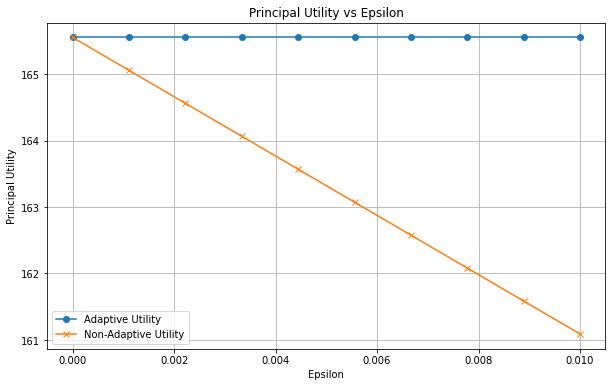

Penalty_margin: 0.1000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.2000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.3000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.4000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.5000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.6000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.7000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.8000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 0.9000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Penalty_margin: 1.0000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️


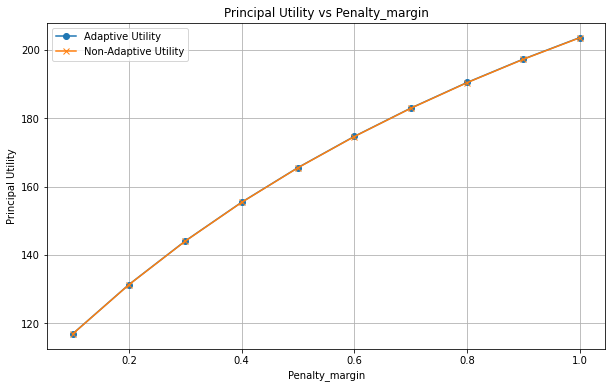

Cost: 0.0000, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 0.1478, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 0.2956, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 0.4433, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 0.5911, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 0.7389, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 0.8867, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 1.0344, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 1.1822, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️
Cost: 1.3300, A1: ✔️, A2: ✔️, A3: ✔️, A4: ✔️, A5: ✔️


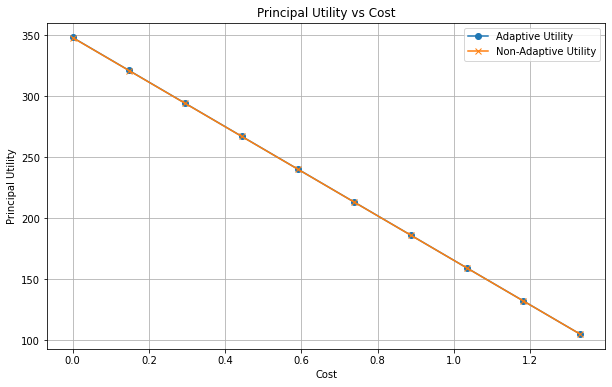

In [136]:
def run_simulation_varying_param(param_name, param_values, fixed_values):
    results_adaptive = []
    results_non_adaptive = []

    for param in param_values:
        # Set parameters
        cost = fixed_values.get('cost', 1.0)
        epsilon = fixed_values.get('epsilon', 1e-6)
        penalty_margin = fixed_values.get('penalty_margin', 0.5)

        if param_name == 'cost':
            cost = param
        elif param_name == 'epsilon':
            epsilon = param
        elif param_name == 'penalty_margin':
            penalty_margin = param
        else:
            raise ValueError("Invalid parameter name.")

        # Initialize parameters
        num_agents, m, type_dist, payments, penalties = initialize_parameters(penalty_margin=penalty_margin)

        # Run adaptive and non-adaptive policies
        adaptive_utility, _ = optimal_adaptive_policy(type_dist, payments, penalties, cost, m, num_agents)
        non_adaptive_utility, _ = optimal_non_adaptive_policy(type_dist, payments, penalties, cost, m, num_agents, epsilon)

        results_adaptive.append(adaptive_utility)
        results_non_adaptive.append(non_adaptive_utility)

        # Verify assumptions
        A1, A2, A3, A4, A5 = verify_assumptions(payments, penalties, cost, type_dist)
        print(f"{param_name.capitalize()}: {param:.4f}, A1: {'✔️' if A1 else '❌'}, A2: {'✔️' if A2 else '❌'}, A3: {'✔️' if A3 else '❌'}, A4: {'✔️' if A4 else '❌'}, A5: {'✔️' if A5 else '❌'}")

    # Plot results
    plot_results(param_values, results_adaptive, results_non_adaptive, param_name)

# Plotting function
def plot_results(param_values, adaptive_utility, non_adaptive_utility, param_name):
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, adaptive_utility, label='Adaptive Utility', marker='o')
    plt.plot(param_values, non_adaptive_utility, label='Non-Adaptive Utility', marker='x')
    plt.xlabel(param_name.capitalize())
    plt.ylabel('Principal Utility')
    plt.title(f'Principal Utility vs {param_name.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example execution
if __name__ == "__main__":
    # Example: vary epsilon
    epsilon_values = np.linspace(0, 0.01, 10)
    run_simulation_varying_param('epsilon', epsilon_values, {'cost': 1.0, 'penalty_margin': 0.5})

    # Example: vary penalty_margin
    penalty_values = np.linspace(0.1, 1.0, 10)
    run_simulation_varying_param('penalty_margin', penalty_values, {'cost': 1.0, 'epsilon': 1e-4})

    # Example: vary cost
    cost_values = np.linspace(0, 1.33, 10)
    run_simulation_varying_param('cost', cost_values, {'epsilon': 1e-4, 'penalty_margin': 0.5})